In [9]:
#hello hisham
from sage.graphs.graph import Graph

# Creating a graph with vertices and edges
G = Graph()
G.add_vertices([1, 2, 3, 4])
G.add_edges([(1, 2, -1), (2, 3, 1), (3, 4, 1), (4, 1, -1), (1, 3, 1)])
L = G.laplacian_matrix()
L_star = L.delete_rows([0]).delete_columns([0])


print(L)
print(L_star)

det = L_star.det()
print(det)


[ 3 -1 -1 -1]
[-1  2 -1  0]
[-1 -1  3 -1]
[-1  0 -1  2]
[ 2 -1  0]
[-1  3 -1]
[ 0 -1  2]
8


In [223]:
def laplacian(G, i, j):
    L = G.laplacian_matrix()
    L_star = L.delete_rows([i]).delete_columns([j])
    det = L_star.det()
    return L, L_star, det

In [16]:
G = Graph()
G.add_vertices([1, 2, 3, 4])
G.add_edges([(1, 2, -1), (2, 3, 1), (3, 4, 1), (4, 1, -1), (1, 3, 1)])

for i in range(0, 3):
    for j in range(0, 3):
        results = laplacian(G, i, j)
        print(f"i = {i+1}, j = {j+1}, det: {results[2]}")

i = 1, j = 1, det: 8
i = 1, j = 2, det: -8
i = 1, j = 3, det: 8
i = 2, j = 1, det: -8
i = 2, j = 2, det: 8
i = 2, j = 3, det: -8
i = 3, j = 1, det: 8
i = 3, j = 2, det: -8
i = 3, j = 3, det: 8


In [6]:

K_51 = Knots().from_table(5, 1)
K_52 = Knots().from_table(5, 2)
K_61 = Knots().from_table(6, 1)
K_62 = Knots().from_table(6, 2)
K_63 = Knots().from_table(6, 3)
K_71 = Knots().from_table(7, 1)
K_72 = Knots().from_table(7, 2)
K_73 = Knots().from_table(7, 3)
K_74 = Knots().from_table(7, 4)
K_75 = Knots().from_table(7, 5)
K_76 = Knots().from_table(7, 6)
K_77 = Knots().from_table(7, 7)

K_51a = K_51.alexander_polynomial()
print(K_51a)




t^-2 - t^-1 + 1 - t + t^2


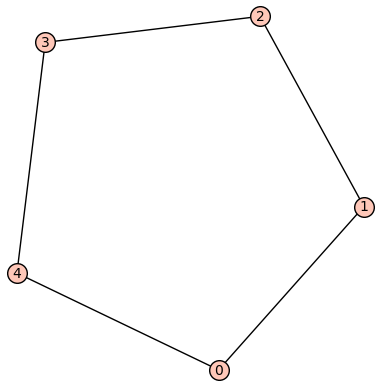

TypeError: 'tuple' object is not callable

In [323]:
G_51 = Graph()
G_51.add_vertices([0, 1, 2, 3, 4])
G_51.add_edges([(0, 1, 1), (1, 2, 1), (2, 3, 1), (3, 4, 1), (0, 4, 1)])

plot = G_51.plot()

plot.show()

laplacian(G_51, 0, 0)

In [65]:
L = Link('3_1')
K = L.sage_link()
gc = K.gauss_code()
pd_code = L.PD_code()
dn = K.dowker_notation()


In [31]:
L = Link('4_1')
K = L.sage_link()
gc = K.gauss_code()
gc

[[2, -3, 4, -2, 1, -4, 3, -1]]

In [79]:
L = Link('3_1')
K = L.sage_link()
gc = K.gauss_code()
pd = L.PD_code()
pd

[(5, 2, 0, 3), (3, 0, 4, 1), (1, 4, 2, 5)]

In [85]:
L = Link('3_1')
K = L.sage_link()
dn = K.dowker_notation()
regions = K.regions()
print(f'Dowker Notation: {dn}, regions: {regions}')

Dowker Notation: [(6, 3), (4, 1), (2, 5)], regions: [[6, 4, 2], [5, -2], [3, -6], [1, -4], [-1, -3, -5]]


In [84]:
def list_filter(l):
    filtered_list = [sublist for sublist in l if len(sublist) == 2]
    return filtered_list

list_filter(regions)

[[5, -2], [3, -6], [1, -4]]

In [179]:
import networkx as nx
def graph_of_link(L):
    dig = L.digraph()
    G = nx.DiGraph()
    for v in dig.vertices:
        G.add_node(v)
    for e in dig.edges:
        G.add_edge(e[0], e[1])
    G_und = G.to_undirected()
    return G_und
    

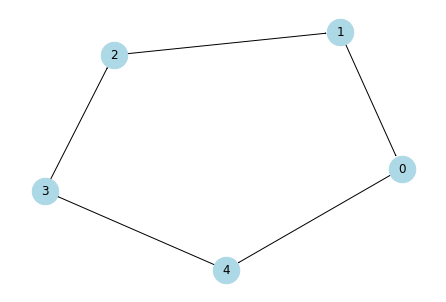

In [117]:
L_51 = Link('5_1')
L_51M = L_51.mirror()

graph_of_link(L_51)


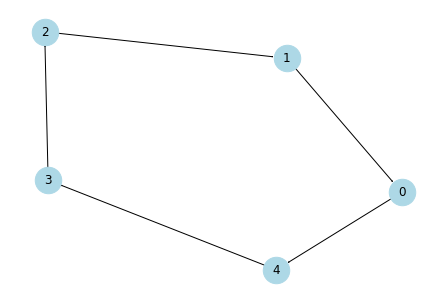

In [118]:
graph_of_link(L_51M)

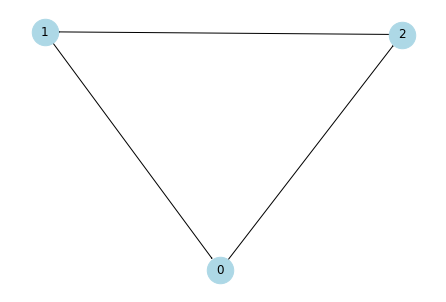

In [115]:
import networkx as nx
L = Link('3_1')
dig = L.digraph()
G = nx.DiGraph()
for v in dig.vertices:
    G.add_node(v)
for e in dig.edges:
    G.add_edge(e[0], e[1])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', arrowsize=1)

In [130]:
L = Link([(3,7,4,6),(7,3,8,2),(1,4,2,5),(5,8,6,1)])
seifert_matrix = L.seifert_matrix()
seifert_matrix

[-1  0]
[-1  1]

In [156]:
L = Link([(5,10,6,1),(1,6,2,7),(7,4,8,5),(9,2,10,3),(3,8,4,9)])
K = L.sage_link()
#plot = K.plot()
#plot.show()
seifert_matrix = K.seifert_matrix()
seifert_matrix
sm_t = seifert_matrix.transpose()
added = sm_t + seifert_matrix
added
added.det()

7

In [157]:
trefoil_w_R2 = Link([(5,1,6,10),(6,1,7,2),(7,3,8,2),(3,9,4,8),(9,5,10,4)])
K = trefoil_w_R2.sage_link()
seifert_matrix = K.seifert_matrix()
seifert_matrix_transpose = seifert_matrix.transpose()
added = seifert_matrix + seifert_matrix_transpose
added.det()

3

In [324]:
def reduced_laplacian(L, i, j):
    mtx = matrix(L)
    L_star = mtx.delete_rows([i]).delete_columns([j])
    det = L_star.det()
    return L_star, det

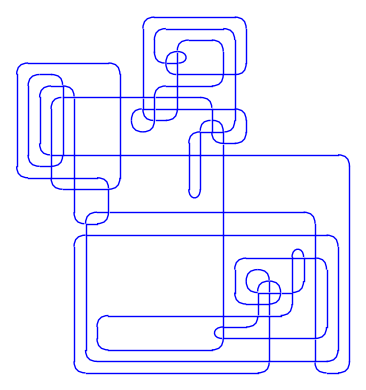

(61 x 61 dense matrix over Integer Ring, 164288793383675974482139776)

In [325]:
import snappy
import networkx as nx

L = snappy.random_link(100)
K = L.sage_link()
G = graph_of_link(L)
plot = K.plot()
plot.show()
lap = nx.laplacian_matrix(G).toarray()
lap
laplacian = reduced_laplacian(lap, 0, 0)
laplacian

In [327]:
import snappy
import networkx as nx


def laplacian_of_link(L, i, j): #returns the reduced laplacian and determinant for a link.
    K = L.sage_link()
    G = graph_of_link(L)
    ###In order to identify the link, there is a reduce function or something in snappy, or some other invariant?
    plot = K.plot()
    plot.show()
    lap = nx.laplacian_matrix(G).toarray()
    laplacian = reduced_laplacian(lap, i, j)
    return laplacian

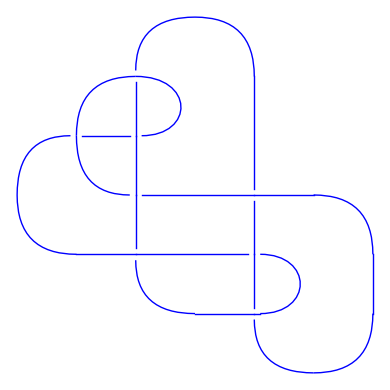

1040


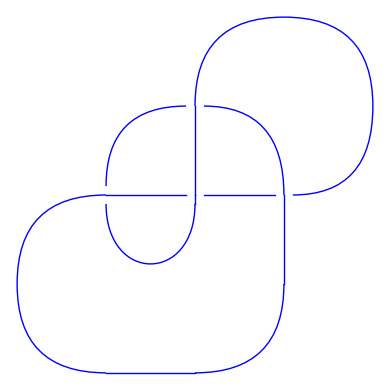

16


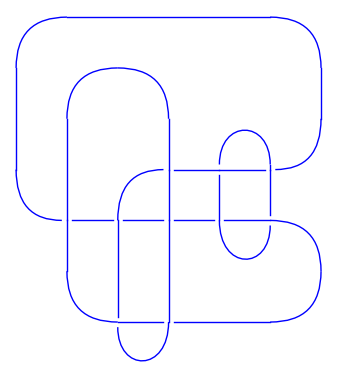

5896


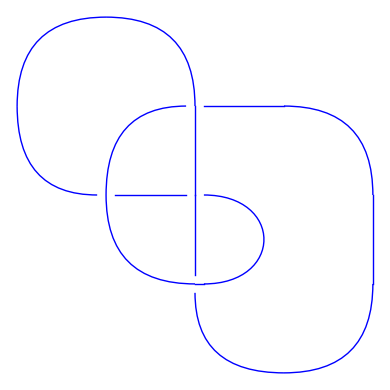

16


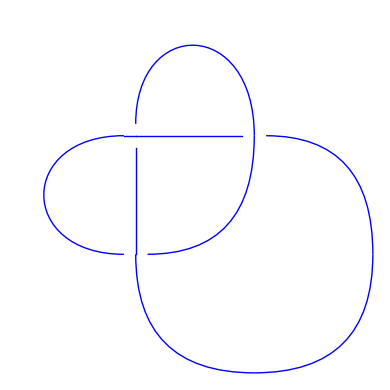

3


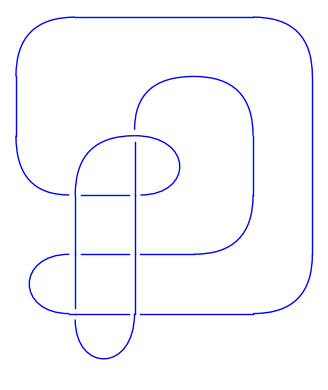

192
Unknot


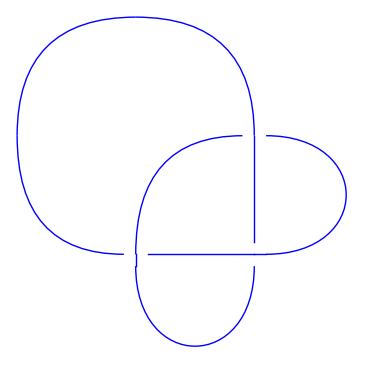

3


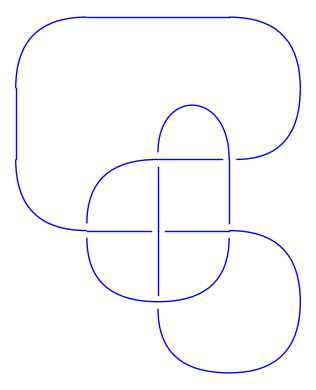

130


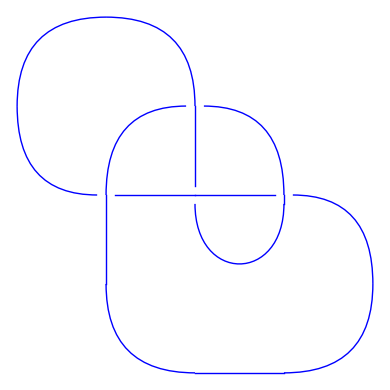

16


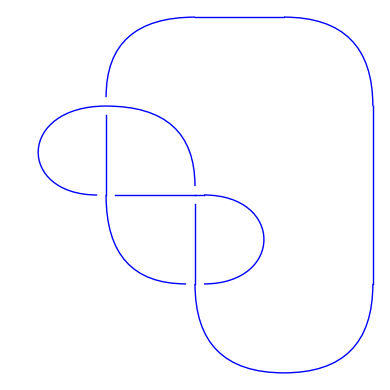

16


In [328]:
i = 0
while i < 10:
    L = snappy.random_link(10)
    if len(L) == 0:
        print("Unknot")
        continue
    print(laplacian_of_link(L, 0, 0)[1])
    i+=1